In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

try:
    import kaleido
except:
    !pip install kaleido
    import kaleido

import kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)


In [2]:
df = pd.read_csv('data/spotify-2023.csv', encoding='latin-1')
df2 = pd.read_csv('data/Spotify-2000.csv')
df3 = pd.read_csv('data/Best Songs on Spotify from 2000-2023.csv', sep=';')

In [3]:
# convert streams column to numeric data type
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# filter out rows with non-numeric values in streams column
df = df.dropna(subset=['streams'])

# apply log10 transformation
#df['log_streams'] = np.log10(df['streams'])

---
### Who are the most successful artists of 2023?

In [96]:
artist_streams = {}
for artist in df['artist(s)_name'].unique():
    artist_streams[artist] = df[df['artist(s)_name']==artist]['streams'].sum()

artist_streams = pd.DataFrame(data=artist_streams.values(), index = artist_streams.keys(), columns=['Total Streams'])
artist_streams.sort_values(by='Total Streams', inplace=True, ascending=False)
artist_streams

top_fifteen_artists = artist_streams.head(15)
top_fifteen_artists

,Total Streams
The Weeknd,1.418555e+10
Taylor Swift,1.405366e+10
Ed Sheeran,1.390895e+10
Harry Styles,1.160865e+10
Bad Bunny,9.997800e+09
Olivia Rodrigo,7.442149e+09
Eminem,6.183806e+09
Bruno Mars,5.846921e+09
Arctic Monkeys,5.569807e+09
Imagine Dragons,5.272485e+09


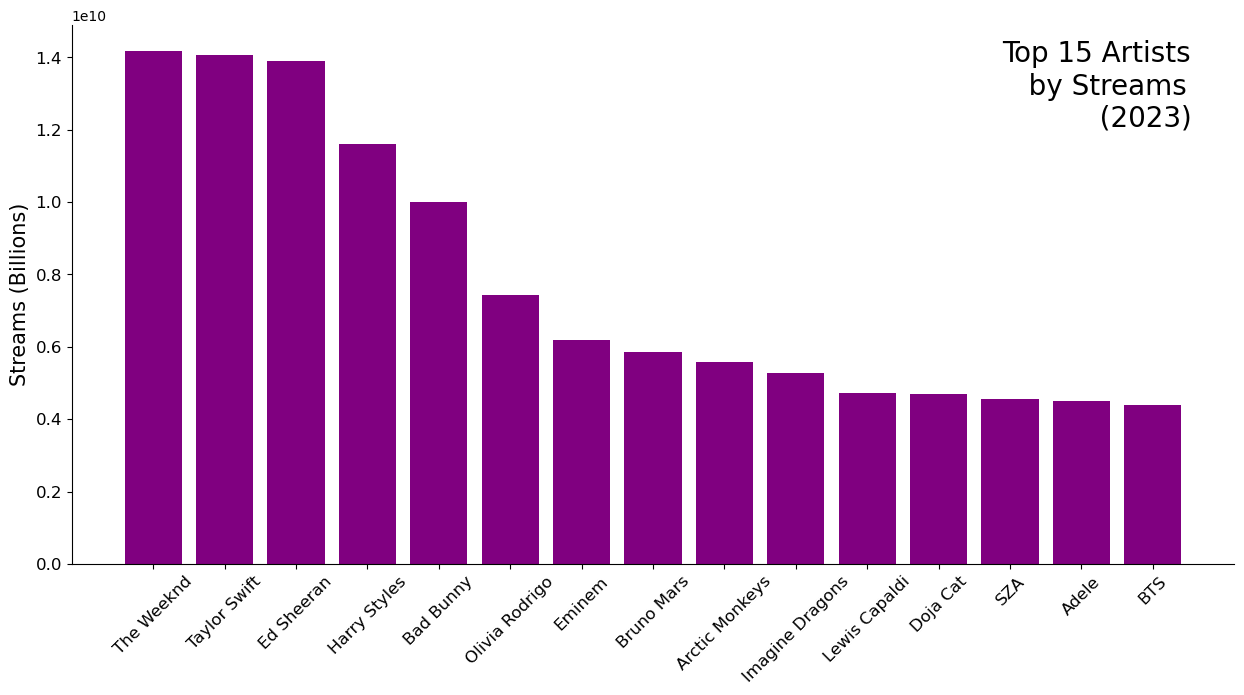

In [97]:
artists = top_fifteen_artists.index

fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.bar(artists, top_fifteen_artists['Total Streams'], color='purple')

[ax.spines[s].set_visible(False) for s in ['top', 'right']]
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_ylabel('Streams (Billions)', fontsize=15)
ax.text(0.80,0.80, 'Top 15 Artists\n   by Streams\n           (2023)', 
        transform=ax.transAxes, 
        va='bottom',
        fontsize=20
        )

fig.show()

---
### How does presence in Spotify Playslist Compare with Streams for 2023?

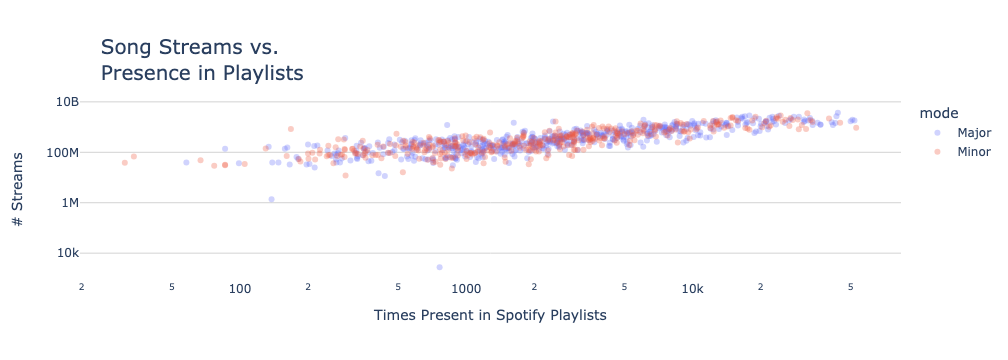

In [78]:
x = 'in_spotify_playlists'
y = 'streams'
xname = 'Times Present in Spotify Playlists'
yname = '# Streams'
df['artist/track'] = df['track_name'] + '-' + df['artist(s)_name']

fig = px.scatter(data_frame=df,
                 x=x,
                 y=y, 
                 color='mode',
                 hover_name='artist/track',
                 title='Song Streams vs. <br>Presence in Playlists',
                 opacity=0.3, 
                 log_x=True,
                 log_y=True
                )
             
fig.update_layout(xaxis_title = xname,
                  yaxis_title = yname,
                  title_x = 0.1, 
                  title_y = 0.85,
                  title_font = dict(size=20),
                  plot_bgcolor='white'
                 )
fig.update_yaxes(gridcolor='lightgray',showgrid=True)

fig


In [75]:
fig.write_image('figures/streams_playlists_scatter.jpeg')

---
### What are the most popular genres of all time?

In [59]:
genre_popularity = {}
for genre in df2['Top Genre'].unique():
    genre_popularity[genre] = df2[df2['Top Genre']==genre]['Popularity'].sum()

genre_popularity = pd.DataFrame(data=genre_popularity.values(), index = genre_popularity.keys(), columns=['Popularity'])
genre_popularity.sort_values(by='Popularity', inplace=True, ascending=False)
genre_popularity

top_fifteen_genres = genre_popularity.head(15)
top_fifteen_genres

,Popularity
album rock,25067
adult standards,7697
alternative rock,5757
dance pop,5687
alternative metal,4621
dutch pop,3981
modern rock,3361
pop,3178
classic rock,3170
dance rock,3088


/tmp/ipykernel_104/1468601343.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(genres, rotation=50, ha='right', fontsize=13)


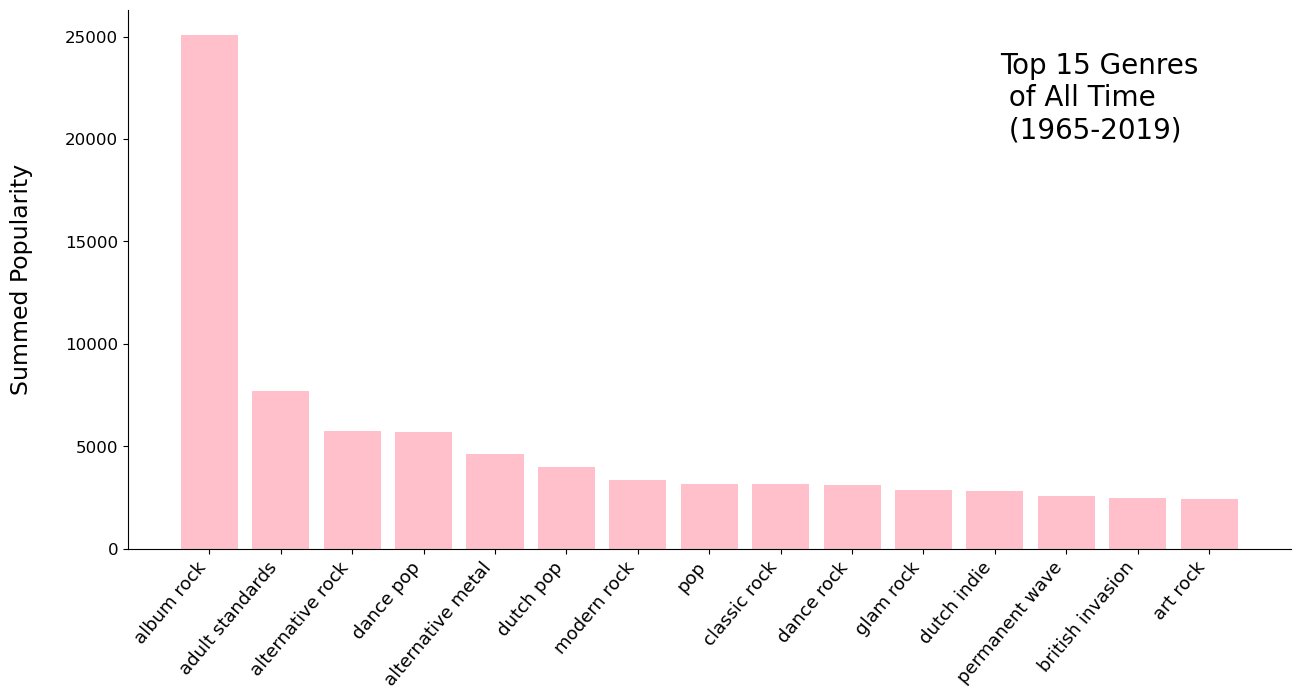

In [65]:
genres = top_fifteen_genres.index

fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.bar(genres, top_fifteen_genres['Popularity'], color='pink')

[ax.spines[s].set_visible(False) for s in ['top', 'right']]
#ax.tick_params(axis='x', rotation=50, labelsize=13, ha='right')
ax.set_xticklabels(genres, rotation=50, ha='right', fontsize=13)
ax.tick_params(axis='y', labelsize=12)

ax.set_ylabel('Summed Popularity\n', fontsize=17)

ax.text(0.75,0.75, 'Top 15 Genres\n of All Time\n (1965-2019)', 
        transform=ax.transAxes, 
        va='bottom',
        fontsize=20
        )

fig.show()

In [66]:
fig.savefig('figures/top_genres_bar.jpeg', bbox_inches='tight')

### What are the most popular genres over time?

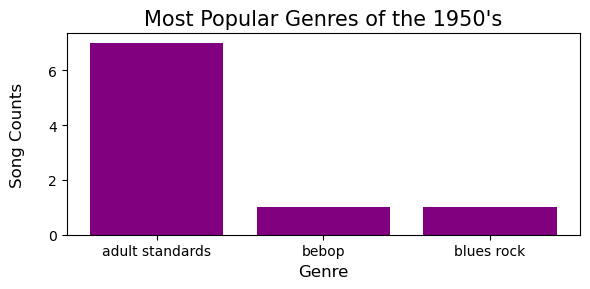

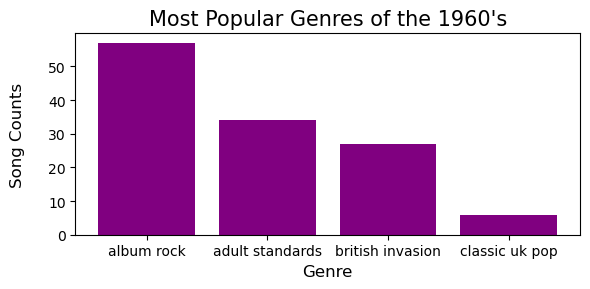

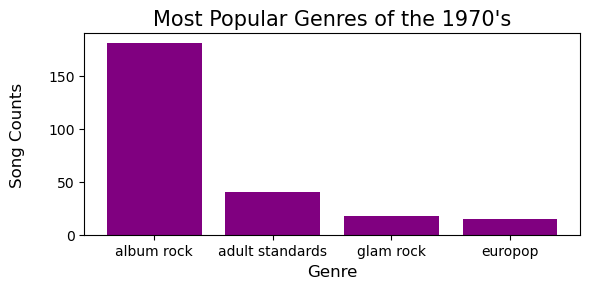

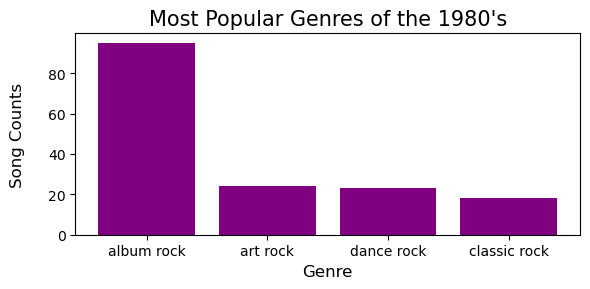

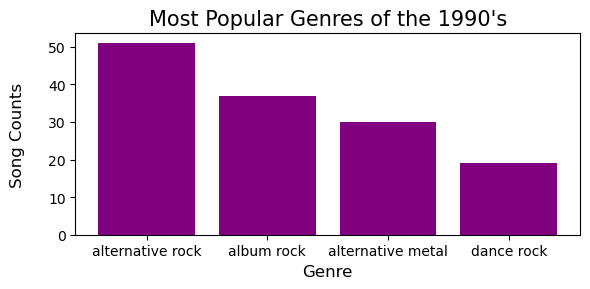

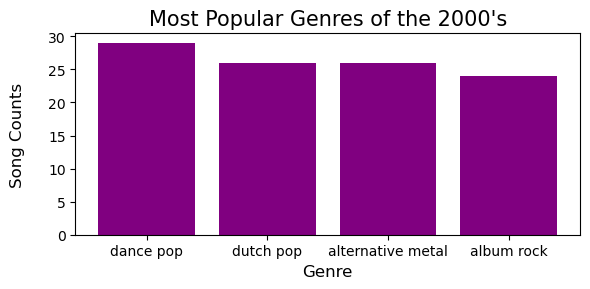

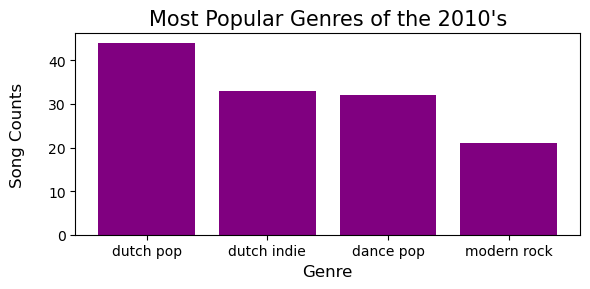

In [7]:
decade_genre_counts = df2.groupby(['decade', 'Top Genre']).size().reset_index(name='count')

for decade in decade_genre_counts['decade'].unique():
    decade_subset = decade_genre_counts[decade_genre_counts['decade'] == decade]
    decade_subset = decade_subset.sort_values(by='count', ascending=False)
    top_genres = decade_subset.head(4)

    fig = plt.figure(figsize=(6,3))
    plt.bar(top_genres['Top Genre'], 
            top_genres['count'],
            color = 'purple')
    plt.xlabel('Genre', fontsize=12) 
    plt.ylabel('Song Counts\n', fontsize=12)  
    plt.title(f"Most Popular Genres of the {decade}'s", fontsize=15)
    plt.xticks(ha='center')
    plt.tight_layout()
    
    plt.show()
    fig.savefig('figures/top_genres_by_decade.jpeg', bbox_inches='tight')

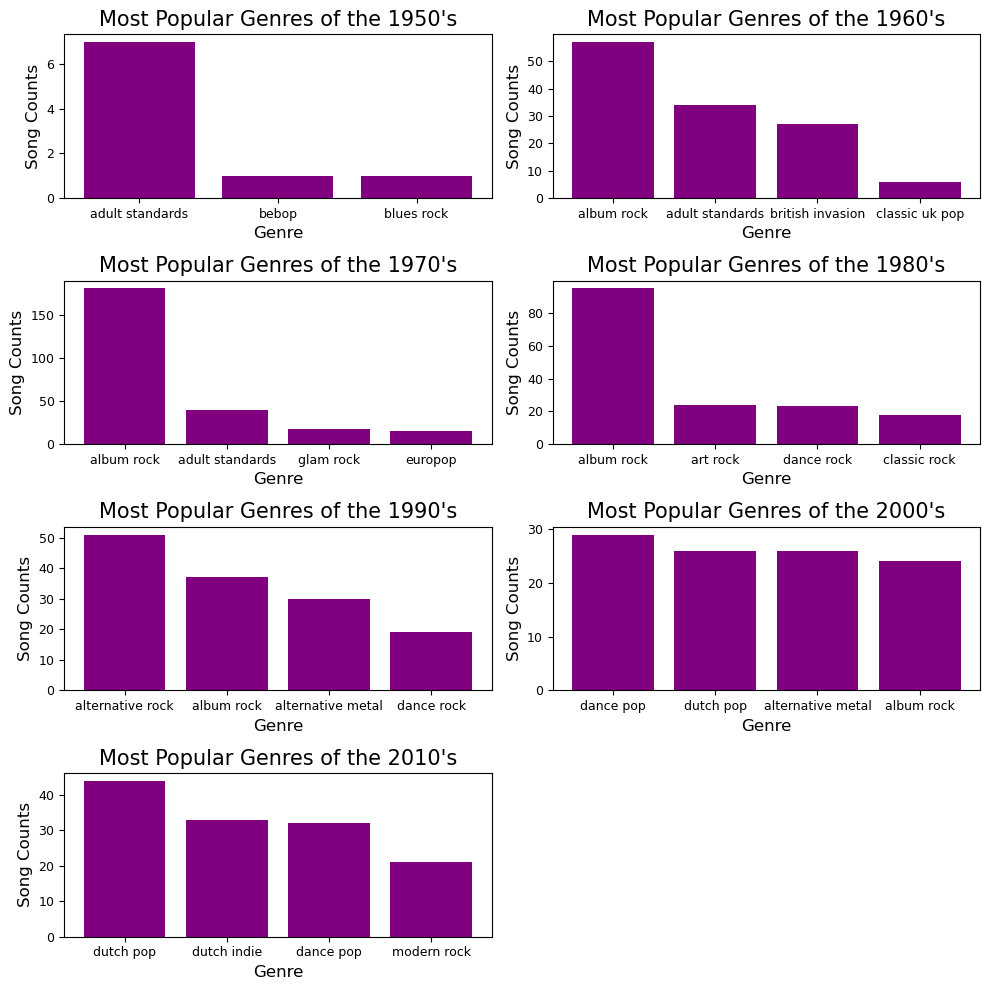

In [33]:
decades = decade_genre_counts['decade'].unique()

NUM_DECADES = len(decades)
NUM_COLS = 2
NUM_ROWS = (NUM_DECADES + NUM_COLS - 1) // NUM_COLS

fig, axes = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(10, 10))

axes = axes.flatten()

for i, decade in enumerate(decades):
    row = i // NUM_COLS  
    col = i % NUM_COLS 
    
    decade_subset = decade_genre_counts[decade_genre_counts['decade'] == decade]
    decade_subset = decade_subset.sort_values(by='count', ascending=False)
    top_genres = decade_subset.head(4)
    
    ax = axes[i]
    ax.bar(top_genres['Top Genre'], top_genres['count'], color='purple')
    ax.set_xlabel('Genre', fontsize=12)
    ax.set_ylabel('Song Counts', fontsize=12)
    ax.set_title(f"Most Popular Genres of the {decade}'s", fontsize=15)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

for j in range(NUM_DECADES, NUM_ROWS * NUM_COLS):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [34]:
fig.savefig('figures/top_genres_by_decade.jpeg', bbox_inches='tight')

---
### How have the audio features of popular tracks changed over time?

In [37]:
def get_decade(year):
    return (year//10)*10

In [38]:
df2['decade'] = df2['Year'].apply(get_decade)

In [39]:
audio_features = ['Beats Per Minute (BPM)', 'Danceability', 'Valence', 'Energy', 
                  'Acousticness', 'Length (Duration)', 'Loudness (dB)', 'Speechiness' ]
df2[audio_features] = df2[audio_features].apply(pd.to_numeric, errors='coerce')

features_by_decade = df2.groupby('decade')[audio_features].mean()

In [40]:
features_by_decade

,Beats Per Minute (BPM),Danceability,Valence,Energy,Acousticness,Length (Duration),Loudness (dB),Speechiness
decade,,,,,,,,
1950,143.666667,51.777778,72.000000,45.333333,71.111111,186.333333,-11.777778,6.222222
1960,116.335443,48.196203,52.987342,49.436709,40.297468,216.598726,-10.613924,4.620253
1970,120.280453,51.583569,54.311615,56.226629,34.249292,271.271429,-10.322946,4.960340
1980,121.081395,57.020349,57.142442,61.031977,25.627907,280.418605,-10.345930,4.729651
1990,118.042296,51.474320,42.906344,59.858006,25.649547,274.595166,-8.978852,4.673716
2000,122.202500,53.405000,46.227500,64.360000,25.535000,253.887500,-7.395000,5.272500
2010,120.230576,54.766917,45.060150,61.107769,27.383459,247.072682,-7.636591,5.363409


In [41]:
legend_labels = {
    'Beats Per Minute (BPM)': 'Beats Per Minute (BPM)',
    'Danceability': 'Danceability %',
    'Valence': 'Valence %',
    'Energy': 'Energy %',
    'Acousticness': 'Acousticness %',
    'Length (Duration)': 'Duration (Seconds)',
    'Loudness (dB)': 'Loudness (dB)',
    'Speechiness': 'Speechiness %'
}

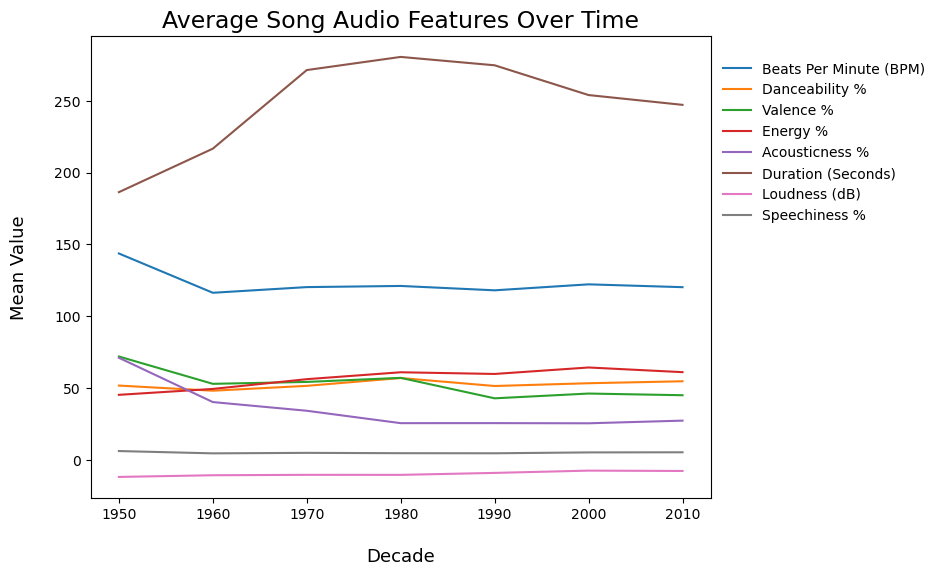

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
for feature in features_by_decade:
    plt.plot(features_by_decade.index, features_by_decade[feature], label=legend_labels[feature])

plt.xlabel('\nDecade', fontsize=13)
plt.ylabel('Mean Value\n', fontsize=13)
plt.title('Average Song Audio Features Over Time', fontsize=17)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.77), fontsize=10, frameon=False)

plt.show()

In [43]:
fig.savefig('figures/features_over_decades_1.jpeg', bbox_inches='tight')

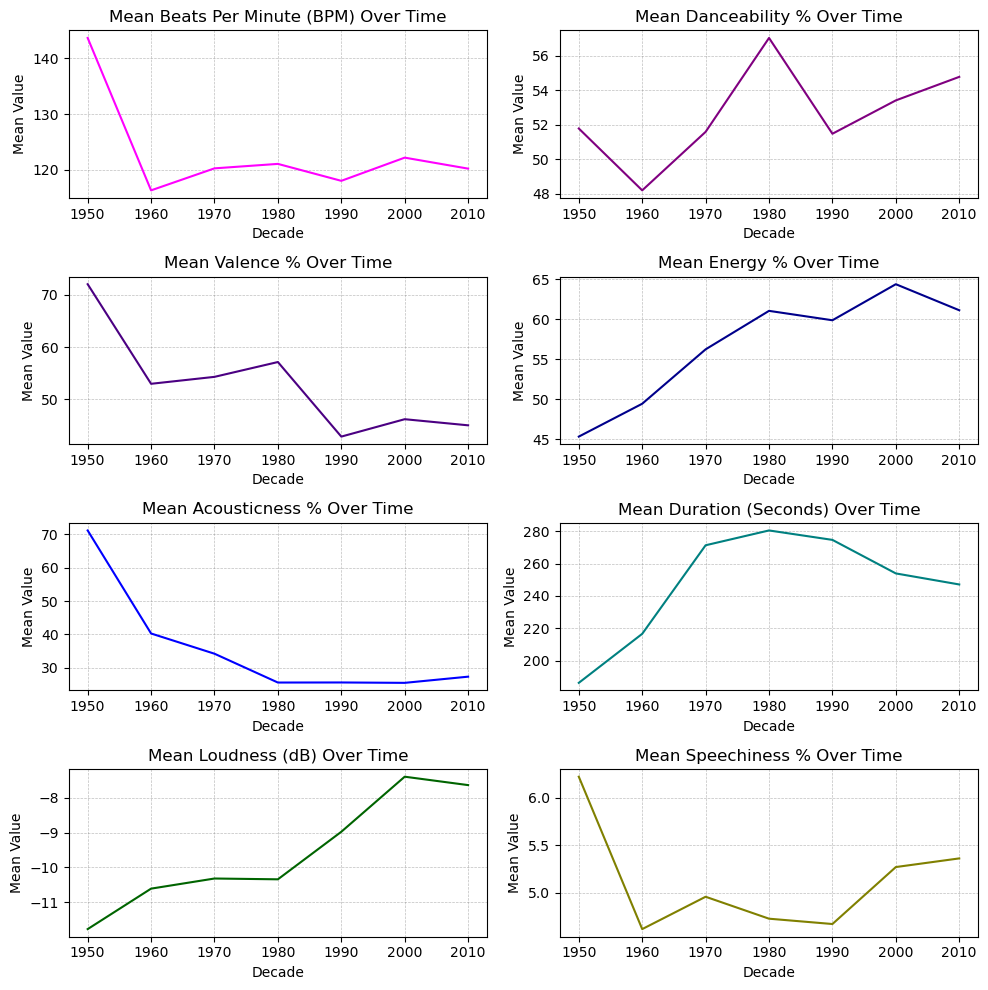

In [44]:
NUM_FEATURES = len(features_by_decade)
NUM_COLS = 2
NUM_ROWS = (NUM_FEATURES + NUM_COLS - 1) // NUM_COLS

fig, axes = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(10, 10))

axes = axes.flatten()

colors = ['magenta', 'purple', 'indigo', 'darkblue', 'blue', 'teal', 'darkgreen', 'olive']

for i, [feature, color] in enumerate(zip(features_by_decade, colors)):
    axes[i].plot(features_by_decade.index, features_by_decade[feature], color=color, linestyle='-')
    axes[i].set_title(f'Mean {legend_labels[feature]} Over Time')
    axes[i].set_xlabel('Decade')
    axes[i].set_ylabel('Mean Value')
    axes[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    axes[i].set_xticks(features_by_decade.index)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()

plt.show()

In [45]:
fig.savefig('figures/features_over_decades_2.jpeg', bbox_inches='tight')

---
### For the most popular songs, how do streams vary based on released year?

In [70]:
df['decade'] = df['released_year'].apply(get_decade)
streams_by_decade = df.groupby('decade', as_index=False)['streams'].sum()
streams_by_decade

,decade,streams
0,1930,9.059852e+07
1,1940,7.853634e+08
2,1950,3.672782e+09
3,1960,2.456991e+09
4,1970,6.429159e+09
5,1980,1.033316e+10
6,1990,1.361563e+10
7,2000,2.317597e+10
8,2010,1.781765e+11
9,2020,2.507227e+11


In [36]:
pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.19.0
    Uninstalling plotly-5.19.0:
      Successfully uninstalled plotly-5.19.0
Note: you may need to restart the kernel to use updated packages.


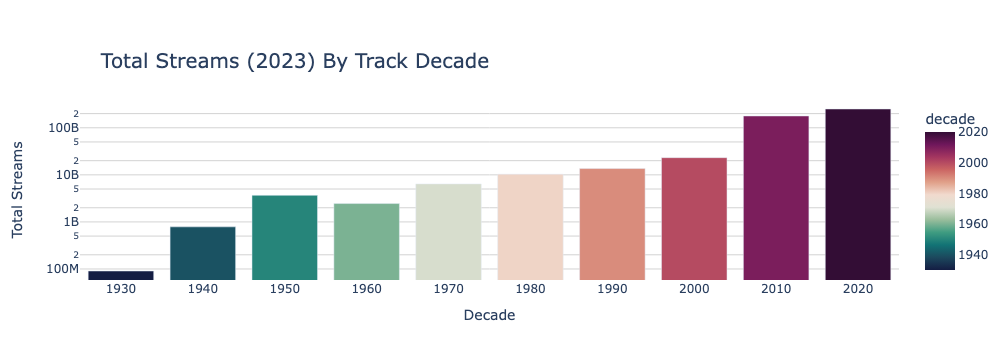

In [76]:
fig = px.bar(streams_by_decade, 
             x='decade', 
             y='streams',
             title='Total Streams (2023) By Track Decade',
             color='decade',
             color_continuous_scale="curl",
             log_y=True
             )

fig.update_xaxes(type='category')

fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': streams_by_decade['decade']},
                  xaxis_title = 'Decade',
                  yaxis_title = 'Total Streams',
                  title_x = 0.1, 
                  title_y = 0.85,
                  title_font = dict(size=20),
                  plot_bgcolor='white'
                 )

fig.update_yaxes(gridcolor='lightgray',showgrid=True)

fig

In [130]:
fig.write_html('figures/streams_by_decade.html')

In [77]:
fig.write_image('figures/streams_by_decade.jpeg')

### For the most successful songs of 2023 (in terms of streams), how does playlist presence compare
### accross platforms?

In [46]:
sorted_df = df.sort_values(by='streams', ascending=False)

In [47]:
most_streams = sorted_df.head(5)
most_streams.set_index('track_name', inplace=True)
most_streams['in_deezer_playlists'] = most_streams['in_deezer_playlists'].str.replace(',', '').astype(int)
most_streams

/tmp/ipykernel_104/128042822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_streams['in_deezer_playlists'] = most_streams['in_deezer_playlists'].str.replace(',', '').astype(int)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,199,...,171,C#,Major,50,38,80,0,0,9,7
Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,0,...,96,C#,Minor,83,93,65,58,0,9,8
Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,125,...,110,C#,Major,50,45,41,75,0,11,3
Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,167,...,98,F#,Minor,82,54,59,69,0,18,10
Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,117,...,90,D,Major,76,91,50,54,0,7,5


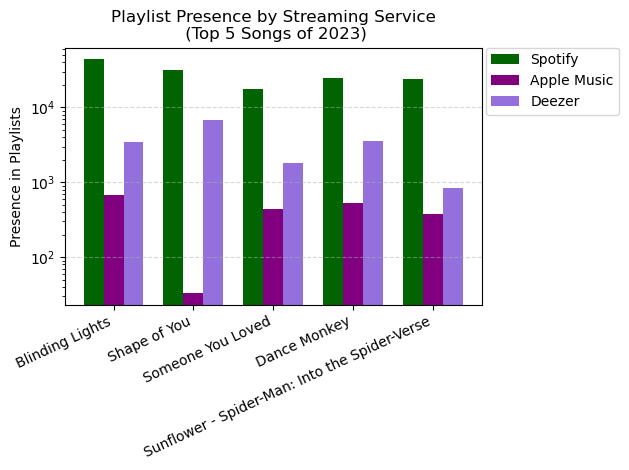

In [56]:
songs = most_streams.index
spotify_data = most_streams['in_spotify_playlists']
apple_data = most_streams['in_apple_playlists']
deezer_data = most_streams['in_deezer_playlists']

# Set up bar positions and width
num_songs = len(songs)
width = 0.25
x = np.arange(num_songs)

fig, ax = plt.subplots()
# Plot grouped bars for each song
plt.bar(x - width, spotify_data, width=width, color='darkgreen', label='Spotify')
plt.bar(x, apple_data, width=width, color='purple', label='Apple Music')
plt.bar(x + width, deezer_data, width=width, color='mediumpurple', label='Deezer')

# Set x-tick positions and labels
plt.xticks(x, songs, rotation=25, ha='right')

# Set labels and title
plt.ylabel('Presence in Playlists')
plt.title('Playlist Presence by Streaming Service\n (Top 5 Songs of 2023)')

# Create a concise legend
legend_labels = ['Spotify', 'Apple Music', 'Deezer']
plt.legend(labels=legend_labels, loc=(1.01,0.74))
plt.yscale('log')

plt.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=1)

# Show plot
plt.tight_layout()
plt.show()

In [57]:
fig.savefig('figures/playist_presence_by_service.jpeg', bbox_inches='tight')

In [58]:
df2

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,decade
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201.0,94,3,71,2000
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207.0,17,7,39,2000
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341.0,2,17,69,2000
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269.0,0,4,76,2000
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256.0,1,3,59,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128.0,84,7,63,1950
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136.0,73,6,69,1950
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162.0,74,7,74,1950
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324.0,54,4,65,1950
